## Basic Classification using example Predicting Customer Purchase predict if customer will the product or not

In [1]:
# pip install matplotlib
# pip install pandas
# pip install numpy
# pip install scikit-learn
# pip install tensorflow

In [6]:
# Import required libraries we will use it latter in code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, LossScaleOptimizer

In [7]:
# Here we are Generating some random data to match with our example so that we can understand the concept
np.random.seed(0)
data = {
    'Age': np.random.randint(18, 65, size=1000),
    # 'Income': np.random.normal(50000, 15000, size=1000),
    # 'Gender': np.random.choice(['Male', 'Female'], size=1000),
    'Purchased': np.random.randint(0, 2, size=1000)
}

df = pd.DataFrame(data)
# this is Our Raw Data without any pre processing
df.head()

,Age,Purchased
0,62,1
1,18,0
2,21,1
3,21,1
4,57,0


In [8]:
# # Convert categorical variables to numerical labels we will see output later on
# label_encoder = LabelEncoder()

# # Machine not understand the string values so we needs to convert them into numeric  values 
# df['Gender'] = label_encoder.fit_transform(df['Gender'])

# df.head()

In [13]:
# Split the data into training and test sets
X = df[['Age']].values

# We have stored Purchased in y value as we this is our prediction result 
y = df['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# here we have 800 records with 4 columns  ['Age', 'Income', 'Gender', 'Clicked Ad']
print(X_train.shape)

X_train

(800, 1)


array([[33],
       [38],
       [21],
       [34],
       [23],
       [45],
       [22],
       [58],
       [25],
       [30],
       [59],
       [37],
       [55],
       [47],
       [21],
       [37],
       [21],
       [25],
       [22],
       [60],
       [47],
       [51],
       [56],
       [52],
       [23],
       [21],
       [41],
       [40],
       [40],
       [63],
       [32],
       [52],
       [23],
       [19],
       [42],
       [36],
       [47],
       [39],
       [59],
       [25],
       [21],
       [21],
       [56],
       [30],
       [64],
       [57],
       [37],
       [38],
       [54],
       [55],
       [21],
       [35],
       [20],
       [50],
       [33],
       [42],
       [50],
       [58],
       [51],
       [27],
       [55],
       [57],
       [18],
       [26],
       [18],
       [45],
       [33],
       [24],
       [39],
       [60],
       [45],
       [53],
       [23],
       [57],
       [50],
       [41],
       [29],

it's often beneficial to standardize or normalize your data before feeding it into a model


Why Standardization?
Equal Scaling: Standardizing the data ensures that all features have the same scale. This is important for algorithms that rely on distance metrics or gradient-based optimization (like neural networks and SVMs) because features with larger scales can dominate those with smaller scales.

Mean Centering: It centers the data around 0, which can make convergence faster during model training and helps algorithms reach optimal performance.

Avoiding Biased Results: It prevents certain features from dominating solely because of their larger numerical range.

In [10]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[ 0.25640872],
       [ 0.18325359],
       [-0.18252204],
       [-0.40198742],
       [ 0.11009846],
       [ 0.47587409],
       [-0.40198742],
       [ 1.28058048],
       [-0.54829767],
       [-1.49931431],
       [ 0.98795998],
       [ 1.42689073],
       [ 0.18325359],
       [-1.27984893],
       [ 0.18325359],
       [ 0.47587409],
       [-0.32883229],
       [-0.40198742],
       [ 0.91480485],
       [-0.47514254],
       [ 0.25640872],
       [ 0.11009846],
       [ 1.3537356 ],
       [ 1.64635611],
       [ 0.91480485],
       [-0.98722842],
       [-1.64562456],
       [-1.42615918],
       [ 1.13427023],
       [ 1.50004586],
       [ 0.40271897],
       [-1.64562456],
       [-0.98722842],
       [-1.27984893],
       [ 0.91480485],
       [ 0.47587409],
       [ 1.3537356 ],
       [ 0.47587409],
       [-0.47514254],
       [ 1.3537356 ],
       [ 1.71951123],
       [ 0.91480485],
       [-0.98722842],
       [-1.27984893],
       [-1.13353868],
       [ 0

## Build the model architecture

In [11]:
(X_train.shape[1],)
# X_train

(1,)

In [12]:
# we are creating a model using tensor flow library
# X_train.shape[1]  code help to identify input shape
model = Sequential([
    # Input layer with 32 neurons, ReLU activation
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    # Hidden layer with 16 neurons, ReLU activation
    Dense(16, activation='relu'),
    # Output layer with 1 neuron, Sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Step 2: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adam optimizer with learning rate 0.001
              # Binary cross-entropy loss function for binary classification
              loss='binary_crossentropy',
              metrics=['accuracy'])  # Evaluation metric to monitor during training is accuracy

# Step 3: Train the model
history = model.fit(X_train, y_train,  # Training data and labels
                    # Number of epochs (iterations over the entire training data)
                    epochs=50,
                    batch_size=64,  # Number of samples per gradient update
                    validation_split=0.2)  # Fraction of training data to be used as validation data

d:\ML Projects\ml-road-map\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5460 - loss: 0.6865 - val_accuracy: 0.5437 - val_loss: 0.6892
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5308 - loss: 0.6916 - val_accuracy: 0.5562 - val_loss: 0.6875
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5280 - loss: 0.6858 - val_accuracy: 0.5000 - val_loss: 0.6876
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5169 - loss: 0.6928 - val_accuracy: 0.5063 - val_loss: 0.6882
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5510 - loss: 0.6868 - val_accuracy: 0.4875 - val_loss: 0.6883
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4932 - loss: 0.6981 - val_accuracy: 0.5125 - val_loss: 0.6878
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5440 - loss: 0.6855 - val_accuracy: 0.5250 - val_loss: 0.6873
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5279 - loss: 0.6901 - val_accuracy: 0.4938 - val_loss

In [4]:
history.model.summary()

NameError: name 'history' is not defined

3. Evaluate the Model
Evaluate the model using the test data:

In [87]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4886 - loss: 0.6964 
Test Accuracy: 0.49000000953674316


4. Plot Training History (Optional)
Optionally, you can plot the training history:

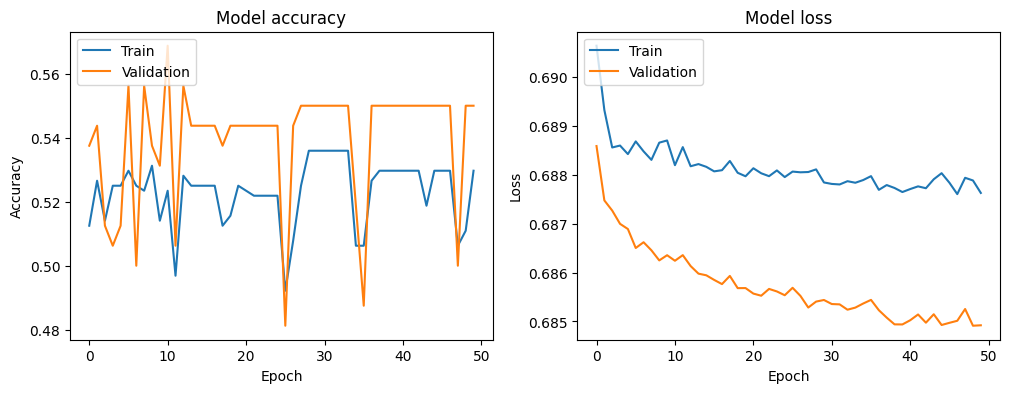

In [70]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()